In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister ,ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


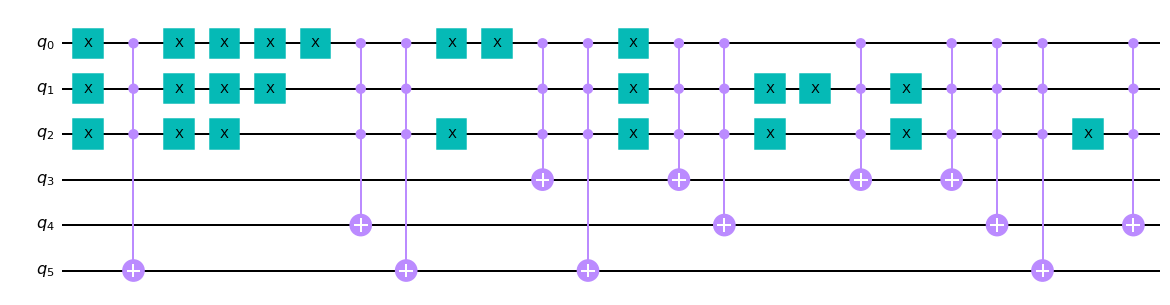

In [2]:
n=3
name_codes =[1, 0, 3 ,5, 6, 4, 7, 2]

database ={}
for i in range(2**n):
    database[i]= name_codes[i]
        
desired_code = 4
binary=bin(desired_code).replace("0b", "")
desired_code='0'*(n-len(binary))+binary



DB = QuantumCircuit(2*n)

def DB_function(QC, name_code):
    binary=bin(name_code).replace("0b", "")
    x='0'*(n-len(binary))+binary
    for j in range(n):
        if x[j]=='1':
            DB.mct(list(np.arange(n)), n+j)
    
for i in range(2**n):
    binary=bin(i).replace("0b", "")
    y='0'*(n-len(binary))+binary
    for j in range(n):
        if y[j]=='0':
            DB.x(j)
            
    DB_function(DB, database[i])
    
    for j in range(n):
        if y[j]=='0':
            DB.x(j)
    

Datab_ckt=DB.to_gate(label='Database')

DB.draw()

In [3]:

#Marking Gate

MG = QuantumCircuit(n+1)
for i in range(n):
    if desired_code[i]=='0':
        MG.x(i)
    
MG.mct(list(np.arange(n)), n)

for i in range(n):
    if desired_code[i]=='0':
        MG.x(i)
    
Marking_gate=MG.to_gate(label='Marking Gate')  

oracle = QuantumCircuit(2*n+1)
oracle.append(Datab_ckt,list(np.arange(2*n)))
oracle.append(Marking_gate,list(np.arange(n,2*n+1)))
oracle.append(Datab_ckt,list(np.arange(2*n)))
#print(database)

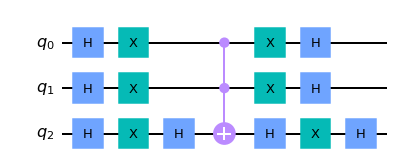

In [4]:
#Diffuser Circuit for Amplitude apmplication 

phase = QuantumCircuit(n)
for i in range(n):
    phase.h(i)
    phase.x(i)
    
phase.h(n-1)
phase.mct(list(np.arange(n-1)), n-1)
phase.h(n-1)

for i in range(n):
    phase.x(i)
    phase.h(i)

Diffuser=phase.to_gate(label='Diffuser')

phase.draw()


/tmp/ipykernel_60/1294305811.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  Grover = Grover + oracle


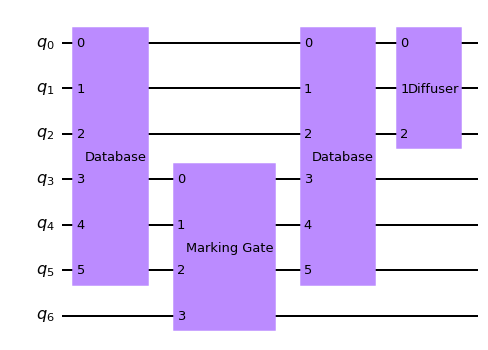

In [8]:
Grover = QuantumCircuit(2*n+1)
Grover = Grover + oracle

Grover.append(Diffuser,list(np.arange(n)))

Grover.draw()


/tmp/ipykernel_60/2203332248.py:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit=circuit+Grover
/tmp/ipykernel_60/2203332248.py:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit=circuit+Grover


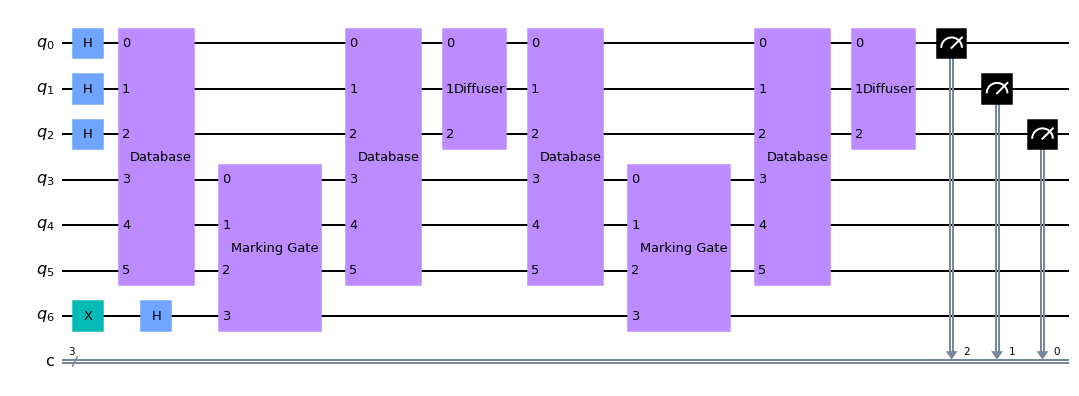

In [9]:
circuit=QuantumCircuit(2*n+1,n)

#MAKE all qubit in equal superpostion state 
for i in range(n):
    circuit.h(i)
#To make ancilla bit in state 1 and further equal superposition 
circuit.x(2*n)
circuit.h(2*n)

circuit=circuit+Grover
circuit=circuit+Grover
circuit.measure(list(np.arange(n)),list(np.arange(n))[::-1])

circuit.draw()

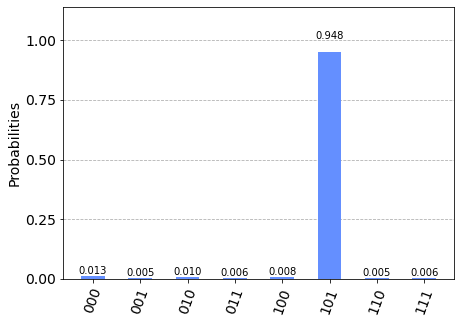

In [10]:
backend=Aer.get_backend('qasm_simulator')
job=execute(circuit,backend, shots=1024)
result=job.result().get_counts()
plot_histogram(result)


In [47]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True)
print("Running on current least busy device: ", device)
print(least_busy(device))

ibmqfactory.load_account:WARNING:2022-02-11 09:46:07,720: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  [<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]
ibmq_lima


In [48]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q-education")
device = provider.get_backend('ibmq_jakarta')
print(type(device))

ibmqfactory.load_account:WARNING:2022-02-11 09:46:16,675: Credentials are already in use. The existing account in the session will be replaced.


<class 'qiskit.providers.ibmq.ibmqbackend.IBMQBackend'>


In [ ]:
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job is queued (1)     

In [ ]:
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

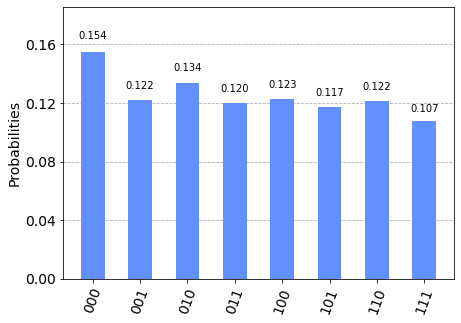

In [50]:
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

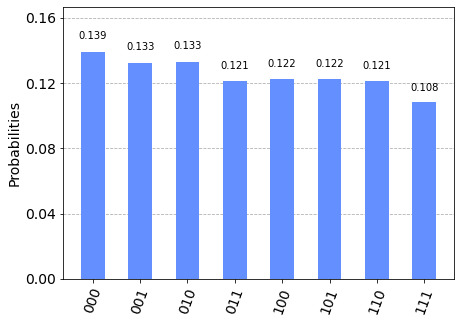

In [44]:
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

In [40]:
from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q-education")
available_cloud_backends = provider.backends() 
print('\n Cloud backends:')
for i in available_cloud_backends: print(i)

ibmqfactory.load_account:WARNING:2022-02-11 09:41:04,202: Credentials are already in use. The existing account in the session will be replaced.



 Cloud backends:
ibmq_qasm_simulator
ibmqx2
ibmq_16_melbourne
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_casablanca
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_perth
